In [2]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_emails = pd.read_csv('email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [6]:
###Data Frames:
##email_data:
#LogId	A unique number used to represent each individual email that was sent
#EmailSentDateTimeUtc	The date and time the email was sent in coordinated universal time
#EmailCampaignId	A unique number used to represent each email campaign. Multiple users can receive emails multiple times from the same email campaign.
#EmailOpenedDateTimeUtc	The date and time the email was opened in coordinated universal time (UTC). Null if the user did not open the email
#EmailClickedDateTimeUtc	The date and time in coordinated universal time (UTC) the 'call to action' button or link in the email was clicked by the user. Null if the user did not click anything in the email.
#UserId	A unique number used to represent each user. The number is assigned in ascending order as users register at FieldLevel, e.g. the x < y implies x registered before y.
#AddressData	A string in JSON format. May be null as not all users have provided an address. The field contains the 5 digit zip code of an address the user provided. Note the format of the JSON object varies. A zipcode will always be identified by the key 'ZipCode'. Some 'ZipCode' keys are duplicated. Some have null values. Some are preceeded by extranious letters.

##activity_data:
#UserId	A unique number used to represent each user that is assigned in ascending order as users register at FieldLevel
#DateOfActivityPST	A date a user made an authenticated request to our servers in pacific standard time (PST).
#ActivityCount	The number of pages/requests the user made on that day. Users who spend more time on FieldLevel have a higher activity count.

In [5]:
#How many rows are in the two datasets? If the log of emails represents 3% of the emails we sent over this period, 
#how many emails did we send? (use python to print the numbers and display them nicely with commas)

#numbers = "{:,}".format(5000000)

#Finding Number of Rows and Changing Format of Number for Each Dataset:
Email_numrows=len(df_emails) #use len() function to find number of rows in Email df
Email_numFORMAT = "{:,}".format(Email_numrows) #{:,} shows to put ',' between the numbers then use .format(variable) to add comas to number: xxx,xxx
Activity_numrows=len(df_activity) #use len() function to find number of rows in Activity df
Activity_numFORMAT = "{:,}".format(Activity_numrows) #{:,} shows to put ',' between the numbers then use .format(variable) to add comas to number: xxx,xxx
print("Number of rows in Email Dataframe:",Email_numFORMAT)
print("Number of rows in Activity Dataframe:",Activity_numFORMAT)

#Find Number of Total Emails Sent if Log is 3%:
solve=round(Email_numrows/.03) #formula: solve*.03=num rows. Use round to get whole number, emails can not be decimals
solve_FORMAT = "{:,}".format(solve) #{:,} shows to put ',' between the numbers then use .format(variable) to add comas to number: xxx,xxx
print("Number of total emails sent if log is 3% of emails:",solve_FORMAT)

Number of rows in Email Dataframe: 474,163
Number of rows in Activity Dataframe: 4,559,973
Number of total emails sent if log is 3% of emails: 15,805,433


In [7]:
#What are the earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)? 
#(use python to print the date in format mm/dd/yyy hour:minute in 24 hour time)

#NOTE:Coordinated Universal Time is 7/8 hours ahead of Pacific Time
#EmailSentDateTimeUtc- df_email

#Import needed packages:
import datetime
import pytz

#Establishing the timezone as (PST) and localizing to give it the timezone information:
d = datetime.datetime.now()#Get time now
timezone = pytz.timezone("America/Los_Angeles") #State timezone is PST using pytz.timezone
d_aware = timezone.localize(d)#Change the current time to PST time by timezone.localize()
d_aware.tzinfo

#Finding the Date of the Most Recent Email Sent and Changing to PST:
most_recent=df_emails['EmailSentDateTimeUtc'].max() #use max() function to find most recent email from Emails df
utc_mr = pytz.utc.localize(datetime.datetime.strptime(most_recent, "%Y-%m-%d %H:%M:%S.%f")) #Use strptime since varible is a string and include the format variable is in (%Y-%m-%d %H:%M:%S.%f)
#Use localize to state value is in UTC
pst_mr = utc_mr.astimezone(pytz.timezone("America/Los_Angeles")) #Converting the UTC to PST by astimezone and pytz.timezone(timezone you want)
#print(utc_mr.isoformat()) #Checker: UTC: Shows that times are the same just the timezones are adjusted
#print(pst_mr.isoformat()) #Checker: PST: Shows that times are the same just the timezones are adjusted
print("Most recent email sent:",pst_mr.strftime("%m/%d/%Y %H:%M"),"PST")#Use strftime to change the format of the variable from the one inputted originally to mm/dd/yyyy hh:mm


##Code below changes the format of the date and time but leaves it in UTC
#mrFORMAT=datetime.datetime.strptime(most_recent, "%Y-%m-%d %H:%M:%S.%f") #use datetime and strptime(since string) to be able to change format. Include variable and the original format
#print(mrFORMAT.strftime("%m/%d/%Y %H:%M")) #strftime and indicate new format

#Finding the Date of the Earliest Email Sent and Changing to PST:
earliest=df_emails['EmailSentDateTimeUtc'].min() #use min function to find earliest email from Emails df
utc_e = pytz.utc.localize(datetime.datetime.strptime(earliest, "%Y-%m-%d %H:%M:%S.%f"))#Use strptime since varible is a string and include the format variable is in (%Y-%m-%d %H:%M:%S.%f)
#Use localize to state value is in UTC
pst_e = utc_e.astimezone(pytz.timezone("America/Los_Angeles")) #Converting the UTC to PST by astimezone and pytz.timezone(timezone you want)
#print(utc_e.isoformat()) #Checker: UTC: Shows that times are the same just the timezones are adjusted
#print(pst_e.isoformat()) #Checker: PST: Shows that times are the same just the timezones are adjusted
print("Earliest email sent:",pst_e.strftime("%m/%d/%Y %H:%M"),"PST")#Use strftime to change the format of the variable from the one inputted originally to mm/dd/yyyy hh:mm

##Code below changes the format of the date and time but leaves it in UTC
#eFORMAT=datetime.datetime.strptime(earliest, "%Y-%m-%d %H:%M:%S.%f")#use datetime and strptime(since string) to be able to change format. Include variable and the format it is in
#print(eFORMAT.strftime("%m/%d/%Y %H:%M"))#strftime and indicate new format


Most recent email sent: 04/19/2021 06:45 PST
Earliest email sent: 01/03/2018 20:29 PST


In [8]:
#Which 10 zip codes receive the most emails and how many emails do they receive?

#NOTE: ZipCode- df_email

#Find the 10 Zip Codes who Recieved the most Emails:
counted=df_emails['ZipCode'].value_counts() #Use value.counts() to Count number of emails per zip code. Ranks in High to Low order
print("Zip Code    Number of Emails")#Print label with the data
print(counted.head(10)) #Use head() function with 10 to show the top 10 largest number of emails and their corresponding zip codes



Zip Code    Number of Emails
63301.000    312
33801.000    310
34210.000    299
38301.000    295
67460.000    285
95971.000    277
42301.000    266
36104.000    254
40769.000    234
85225.000    229
Name: ZipCode, dtype: int64


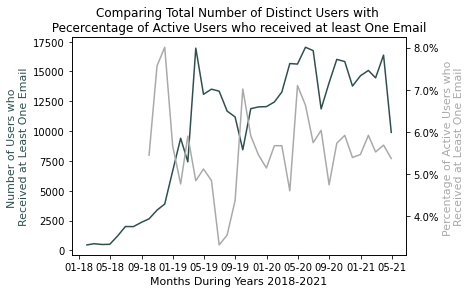

In [9]:
#Plot two lines on a single graph.
#-total distinct users who were sent at least 1 email by month and year.
#-the monthly percentage of users who were sent an email and were active the same day

#Import needed packages:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter


#counted=df_emails['UserId'].value_counts() #use value_counts() to count each User Id
#print(counted)

#Grouping Dataframe to find the Total Number of Users per Month who Recieved at Least One Email:
df_emails['EmailSentDateTimeUtc'] = pd.to_datetime(df_emails['EmailSentDateTimeUtc']) #Use to_datetime to change EmailSentDateTimeUtc variable to DateTimeIndex. 
#Need variable in DateTime Index to be able to use variable as a key to group dataframe by
newframe=df_emails.groupby(pd.Grouper(key='EmailSentDateTimeUtc', axis=0, freq='M'))['UserId'].nunique()
#Use groupby() to group the dataframe. Use Grouper() and specify EmailSentDateTimeUtc as the key. Change freq to 'M' to specify the grouping being done by month
#Include UserId at the end and nunique() to give counts of total unique UserId's for each month

#print(newframe)

#Grouping Dataframe to find the Total Number of Active Users per Month:
df_emails['EmailClickedDateTimeUtc'] = pd.to_datetime(df_emails['EmailClickedDateTimeUtc'])#Use to_datetime to change EmailClickedDateTimeUtc variable to DateTimeIndex. 
#Need variable in DateTime Index to be able to use variable as a key to group dataframe by
newframe2=df_emails.groupby(pd.Grouper(key='EmailClickedDateTimeUtc', axis=0, freq='M'))['UserId'].nunique() 
#Use groupby() to group the dataframe. Use Grouper() and specify EmailClickedDateTimeUtc as the key. Change freq to 'M' to specify the grouping being done by month
#Include UserId at the end and nunique() to give counts of total unique UserId's for each month

#print(newframe2)

#Finding the Monthly Percentage of Users who were Active and Received an Email:
newframe3=(newframe2/newframe)#Divides the number of active users per month by the total number of users per month
#Multiplying by 100 and adding % sign will be added in code for graphic

#print(newframe3)

#Creating the Graphic:
fig,ax = plt.subplots()#Use subplots() to create the Shell of the figure
ax.plot(newframe, color="darkslategray")#Use plot() to plot information from newframe series(created above) as a line plot and change color of the line to dark slate gray
ax.set_xlabel("Months During Years 2018-2021",fontsize=11)#Use set_xlabel() to add x axis label with 11 font size
ax.set_ylabel("Number of Users who \nReceived at Least One Email",color="darkslategray",fontsize=11)#Use set_ylabel() to add y axis label with 11 font size. 
#Change color to dark slate gray to match with the color of the corresponding line for easy viewing
ax.set_title("Comparing Total Number of Distinct Users with \n Pecercentage of Active Users who Received at least One Email ",fontsize=12)#Use set_title() to add title
ax2=ax.twinx()#Use twinx() to create a twin axis sharing the x axis. Adds a second y axis that is different from the first y axis
ax2.plot(newframe3,color="darkgray")#Use plot() to plot information from newframe3 series(created above) as a line plot and change color of the line to dark gray
ax2.set_ylabel("Percentage of Active Users who \nReceived at Least One Email",color="darkgray",fontsize=11)#Use set_ylabel() to add y axis label with 11 font size. 
#Change color to dark gray to match with the color of the corresponding line for easy viewing
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))#use set_major_formatter() and mtick.PercentFormatter() to change the second y axis values to percentages
date_form = DateFormatter("%m-%y")#Use DateFormatter() to create a new format for the date labels on the x axis. Format: mm-yy
ax2.xaxis.set_major_formatter(date_form)#Use set_major_formatter() to change the date labels on the x axis to the new format created above
plt.show()#Show final graphic


